In [278]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.spatial import Voronoi, voronoi_plot_2d

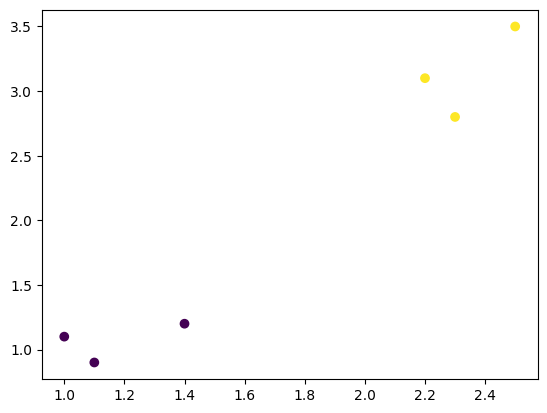

In [279]:
X = np.array([
    [1.0, 1.1, 1.4, 2.2, 2.3, 2.5],
    [1.1, 0.9, 1.2, 3.1, 2.8, 3.5],
])

y = np.array([0, 0, 0, 1, 1, 1])

_ = plt.scatter(*X, c=y)

## clustering (lloyd's algo)

In [280]:
n = X.shape[1]
k = 2

#### initial cluster assignment

In [281]:
np.random.seed(2)
cluster_assignment = np.random.randint(k, size=n)
cluster_assignment

array([0, 1, 1, 0, 0, 1], dtype=int32)

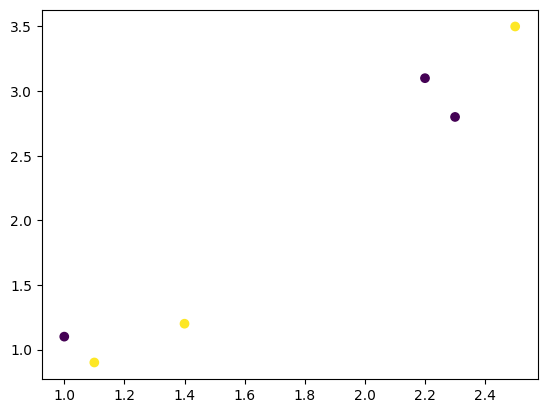

In [282]:
_ = plt.scatter(*X, c=cluster_assignment)

In [283]:
# k_ = 0

# sample_indices = np.where(cluster_assignment == k_)[0]
# samples = X[:, sample_indices]

# sample_indices
# samples

In [284]:
# center = samples.mean(axis=1)
# center

#### calculate cluster centers

In [285]:
centers = np.array([[], []])

for k_ in range(k):
  sample_indices = np.where(cluster_assignment == k_)[0]
  samples = X[:, sample_indices]
  center = samples.mean(axis=1)
  centers = np.column_stack((centers, center))

centers

array([[1.83333333, 1.66666667],
       [2.33333333, 1.86666667]])

#### calculate value of objective function

* we are scoring: given a cluster assignment, how good is it?
* we need to minimize this value

In [286]:
total = 0

for i in range(n):
  sample = X[:, i]
  cluster = cluster_assignment[i]
  center = centers[:, cluster]
  total += np.linalg.norm(sample - center)**2

total

np.float64(8.506666666666666)

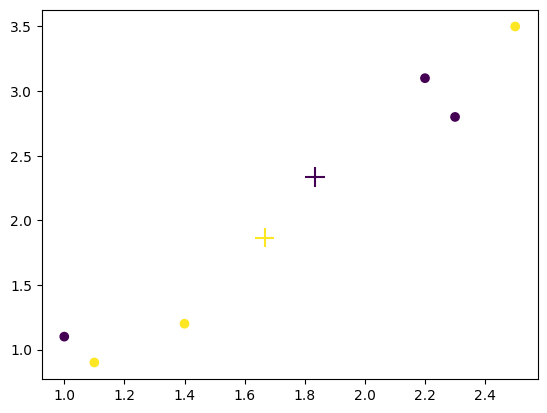

In [287]:
_ = plt.scatter(*X, c=cluster_assignment)
_ = plt.scatter(*centers, marker='+', s=200, c=[0, 1])

#### cluster reassignment (0 is blue color)

In [288]:
for i in range(n):
  sample = X[:, i]

  distances = []
  for center in centers.T:
    distances.append(np.linalg.norm(sample - center))

  nearest_cluster = np.argmin(distances)
  current_cluster = cluster_assignment[i]

  if nearest_cluster != current_cluster:
    cluster_assignment[i] = nearest_cluster
    print("doing some reassignment...")

doing some reassignment...
doing some reassignment...


#### final solution

In [289]:
cluster_assignment  # found by algo
y  # ground truth

array([1, 1, 1, 0, 0, 0], dtype=int32)

array([0, 0, 0, 1, 1, 1])

In [290]:
# centers = np.array([[], []])

# centers = np.append(centers, np.array([2, 1]).reshape(-1, 1), axis=1)
# centers = np.append(centers, np.array([4, 5]).reshape(-1, 1), axis=1)
# centers = np.append(centers, np.array([3, 0]).reshape(-1, 1), axis=1)
# centers

In [291]:
# centers = np.array([[], []])

# centers = np.column_stack((centers, np.array([2, 1])))
# centers = np.column_stack((centers, np.array([4, 5])))
# centers = np.column_stack((centers, np.array([3, 0])))
# centers